In [1]:
!pip install wordcloud 

  Using cached wordcloud-1.9.1.1-cp310-cp310-win_amd64.whl (152 kB)


In [53]:
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range

# Note: you may need to update your version of future
# sudo pip install -U future

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from wordcloud import WordCloud

In [54]:
data = pd.read_csv("assets/spam.csv", encoding="ISO-8859-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [55]:
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [56]:
data.columns = ["labels", "data"]
data.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [57]:
# Create binary labels

data["b_labels"] = data["labels"].map({"ham" : 0, "spam" : 1})
Y = data["b_labels"].to_numpy()
data.head()

,labels,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [58]:
# Split up the data

data_train, data_test, YTrain, YTest = train_test_split(data["data"], Y, test_size=0.33)

tfidf.fit_transform(data_train) digunakan untuk mempelajari dan menghitung representasi TF-IDF dari kata-kata dalam data_train dan kemudian mengubah dokumen menjadi matriks yang merepresentasikan kata-kata tersebut. Hasil dari proses ini adalah Xtrain.

Sementara tfidf.transform(data_test) digunakan untuk hanya menghitung representasi TF-IDF dari kata-kata dalam data_test berdasarkan informasi yang telah dipelajari selama proses fit_transform pada data_train. Hasil dari proses ini adalah Xtest.

In [59]:
# Try multiple ways of calculating features

tfidf = TfidfVectorizer(decode_error='ignore')
Xtrain = tfidf.fit_transform(data_train)
Xtest = tfidf.transform(data_test)

# vectorizer = CountVectorizer(decode_error='ignore')
# Xtrain = vectorizer.fit_transform(data_train)
# Xtest = vectorizer.transform(data_test)

In [60]:
Xtrain

<3733x6941 sparse matrix of type '<class 'numpy.float64'>'
	with 49083 stored elements in Compressed Sparse Row format>

TFID Library

- Train Score: 0.9699973211893919
- Test Score: 0.9532354540511148

CountVectorizer Library

- Train Score: 0.99464237878382
- Test Score: 0.9825992387166939

In [61]:
# create the model, train it, print scores

model = MultinomialNB()
model.fit(Xtrain, YTrain)
print("Train Score:", model.score(Xtrain, YTrain))
print("Test Score:", model.score(Xtest, YTest))
# exit()

Train Score: 0.9683900348245379
Test Score: 0.958673191952148


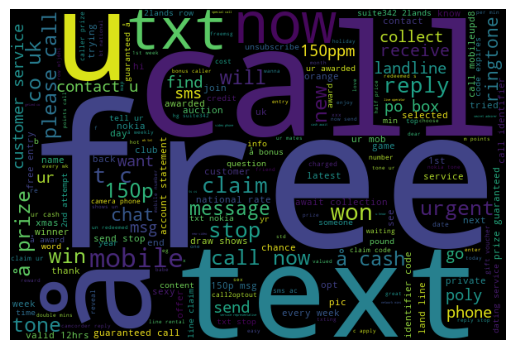

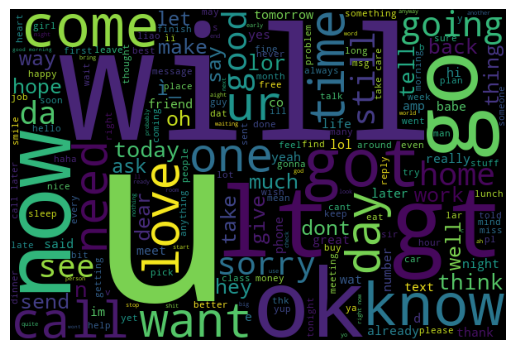

In [63]:
# visualize the data
def visualize(label):
    words = ''
  
    for msg in data[data['labels'] == label]['data']:
        msg = msg.lower()
        words += msg + ' '

    wordcloud = WordCloud(width=600, height=400).generate(words)

    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

visualize('spam')
visualize('ham')

In [65]:
# see what we're getting wrong

X = tfidf.transform(data['data'])
data['predictions'] = model.predict(X)

# X = vectorizer.transform(data['data'])
# data['predictions'] = model.predict(X)

data.head()

,labels,data,b_labels,predictions
0,ham,"Go until jurong point, crazy.. Available only ...",0,0
1,ham,Ok lar... Joking wif u oni...,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,1
3,ham,U dun say so early hor... U c already then say...,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0


In [66]:
# things that should be spam

sneaky_spam = data[(data['predictions'] == 0) & (data['b_labels'] == 1)]['data']

for msg in sneaky_spam:
    print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Thanks for your subscription to Ringtone UK your mobile will be charged å£5/month Please confirm by replying YES or NO. If you reply NO you will not be charged
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
Your free ringtone is waiting to be collected. Simply text the password \MIX\" to 85069 to verify. Get Usher and Britney. FML
You'll not rcv any more msgs from the chat svc. For FREE Hardcore services text GO to: 69988 If u get nothing u must Age Verify with yr network & try again
-PLS STOP bootydelious (32/F) is inviting you to be her friend. Reply YES-434 or NO-434 See her: www.SMS.ac/u/bootydelious STOP? Send STOP FRND to 62468
BangBabes Ur order is on the way. U SHOULD receive a Service Msg 2 download UR content. If U do not, GoTo wap. bangb. tv on UR mobile internet/service menu
Will u meet ur drea

In [81]:
# things that should not be spam

not_actually_spam = data[(data['predictions'] == 1) & (data['b_labels'] == 0)]['data']

for msg in not_actually_spam:
    print(msg)